C:\Users\hadiu\AppData\Local\Temp\ipykernel_1296\196703183.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("dragon fruit.jpeg")


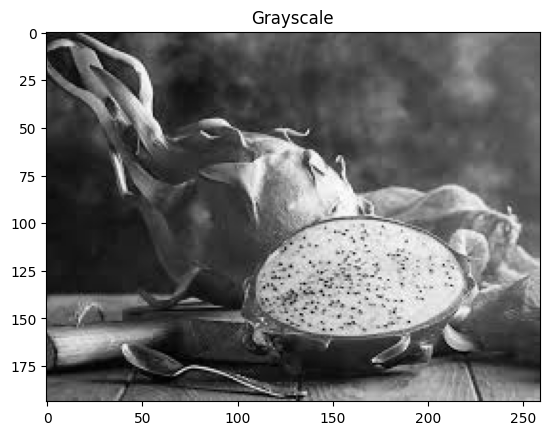

In [8]:
# Import Library
import numpy as np
import imageio
import matplotlib.pyplot as plt

# load image menggunakan imageio
img = imageio.imread("dragon fruit.jpeg")

# menentukan ukuran gambar
# Mengambil informasi ukuran gambar menggunakan atribut shape dari variabel img.
# img_height menyimpan nilai tinggi gambar, img_width menyimpan nilai lebar gambar, dan img_channel menyimpan nilai jumlah channel warna (RGB).
img_height = img.shape[0]
img_width = img.shape[1]
img_channel = img.shape[2]

# inisialiasasi array kosong dengan tipe data uint8 untuk gambar grayscale
img_grayscale = np.zeros(img.shape, dtype=np.uint8)

# loop untuk mengubah setiap piksel menjadi grayscale
for y in range(0, img_height):
    for x in range(0, img_width):
        red = img[y][x][0]
        green = img[y][x][1]
        blue = img[y][x][2]
        gray = (int(red) + int(green) + int(blue)) / 3
        img_grayscale[y][x] = (gray, gray, gray)

# menampilkan gambar grayscale        
plt.imshow(img_grayscale)
plt.title("Grayscale")
plt.show()

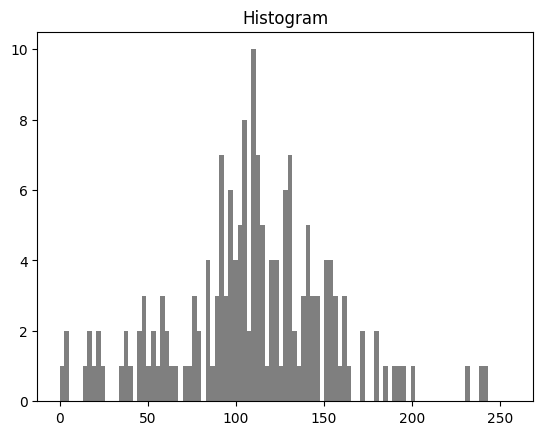

In [9]:
# Inisialisasi array kosong hg dengan ukuran 256 untuk menampung nilai histogram setiap intensitas piksel (0-255)
hg = np.zeros((256))

# Inisialisasi array kosong dengan nilai 0 sebanyak 256 elemen
for x in range(0, 256):
    hg[x] = 0

# Looping melalui setiap piksel pada gambar grayscale dan menghitung histogram
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hg[gray] += 1


# Menampilkan histogram menggunakan plt.hist()
bins = np.linspace(0, 256, 100)
plt.hist(hg, bins, color="black", alpha=0.5)
plt.title("Histogram")
plt.show()

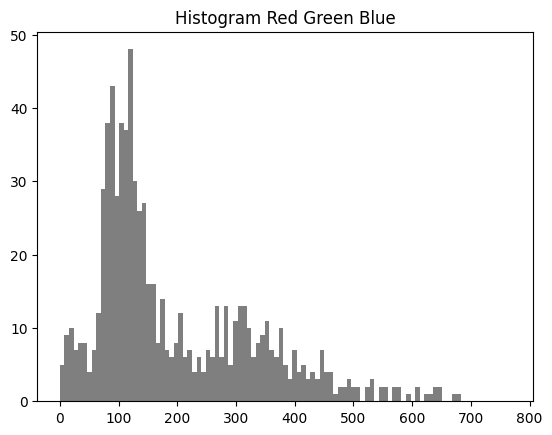

In [10]:
# Inisialisasi array kosong hgr, hgg, hgb, dan hgrgb dengan ukuran 256 
# untuk menampung nilai histogram setiap intensitas piksel pada setiap channel warna (R, G, B) dan gabungan (RGB).
hgr = np.zeros((256))
hgg = np.zeros((256))
hgb = np.zeros((256))
hgrgb = np.zeros((768))

# Inisialisasi array kosong dengan nilai 0 sebanyak 256 dan 768 elemen
for x in range(0, 256):
    hgr[x] = 0
    hgg[x] = 0
    hgb[x] = 0
    
for x in range(0, 768):
    hgrgb[x] = 0

# Inisialisasi array kosong dengan nilai 0 sebanyak 256 dan 768 elemen
for x in range(0, 256):
    hgr[x] = 0
    hgg[x] = 0
    hgb[x] = 0
    
for x in range(0, 768):
    hgrgb[x] = 0

# th = int(256/64)
temp = [0]

# Looping melalui setiap piksel pada gambar dan menghitung histogram pada setiap channel RGB
for y in range(0, img.shape[0]):
    for x in range(0, img.shape[1]):
        red = int(img[y][x][0])
        green = int(img[y][x][1])
        blue = int(img[y][x][2])
        
         # Menambahkan nilai 256 pada channel G dan 512 pada channel B untuk menghindari overlapping dengan nilai pada channel R
        green = green + 256
        blue = blue + 512
#         temp.append(green)
        hgrgb[red] += 1
        hgrgb[green] += 1
        hgrgb[blue] += 1

# Menampilkan histogram dengan menggunakan plt.hist()
binsrgb = np.linspace(0, 768, 100)
plt.hist(hgrgb, binsrgb, color="black", alpha=0.5)
# plt.plot(hgrgb)
plt.title("Histogram Red Green Blue")
plt.show()

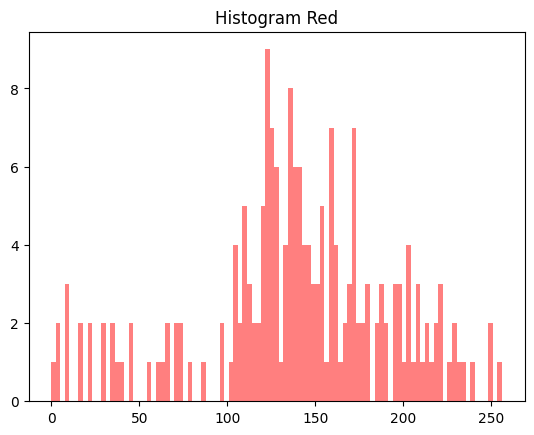

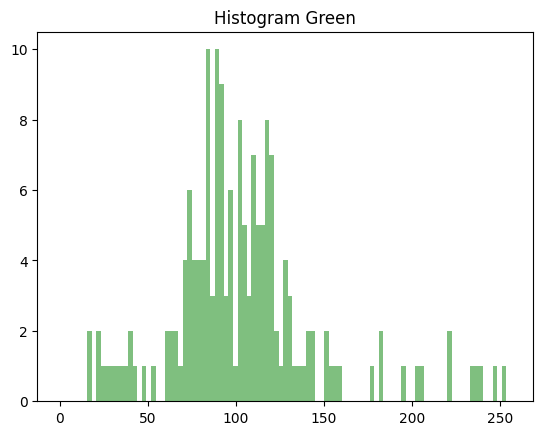

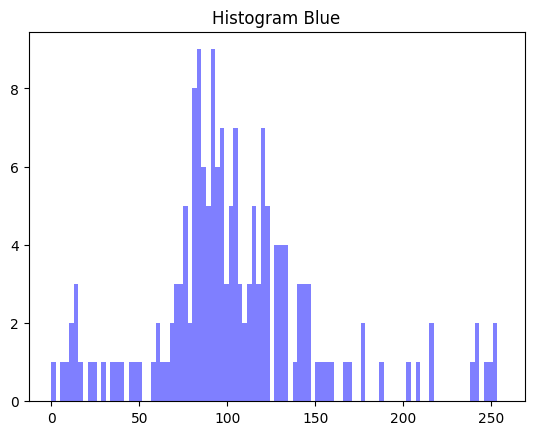

In [11]:
# menghitung histogram dari masing-masing komponen warna (merah, hijau, dan biru) pada gambar. 
for y in range(0, img_height):
    for x in range(0, img_width):
        red = img[y][x][0]
        green = img[y][x][1]
        blue = img[y][x][2]
        hgr[red] += 1
        hgg[green] += 1
        hgb[blue] += 1

# menampilkan histogram red
bins = np.linspace(0, 256, 100)
plt.hist(hgr, bins, color="red", alpha=0.5)
plt.title("Histogram Red")
plt.show()

# menampilkan histogram green
plt.hist(hgg, bins, color="green", alpha=0.5)
plt.title("Histogram Green")
plt.show()

# menampilkan histogram blue
plt.hist(hgb, bins, color="blue", alpha=0.5)
plt.title("Histogram Blue")
plt.show()

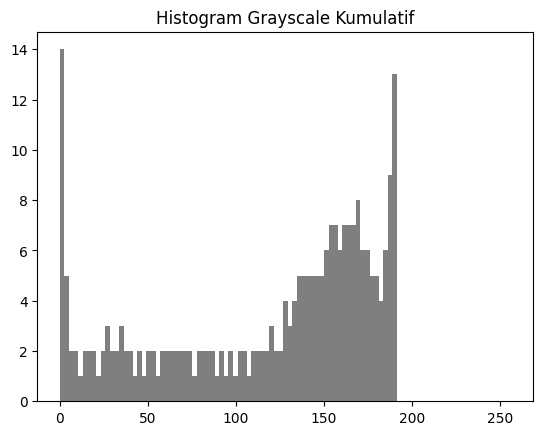

In [12]:
# inisialisasi array kosong dengan panjang 256 elemen
hgk = np.zeros((256))
c = np.zeros((256))

# Pada baris ini, array hgk dan c yang akan digunakan untuk menyimpan nilai histogram dan histogram kumulatif diinisialisasi dengan 0.
for x in range(0, 256):
    hgk[x] = 0
    c[x] = 0

# Pada baris ini, setiap piksel pada citra grayscale dibaca dan nilai grayscale-nya digunakan sebagai indeks pada array hgk.
# Kemudian, nilai pada array hgk yang sesuai dengan indeks tersebut akan di-increment (ditambahkan 1).
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hgk[gray] += 1

# Pada baris ini, array c dihitung dengan melakukan operasi kumulatif pada array hgk. Setiap elemen pada array c dihitung sebagai akumulasi dari elemen-elemen sebelumnya
# pada array hgk dan elemen saat ini pada array hgk. Nilai c[0] diisi dengan nilai hgk[0] untuk menjaga nilai pertama dari array c.                
c[0] = hgk[0]
for x in range(1, 256):
     c[x] = c[x-1] + hgk[x]

# Pada baris ini, nilai maksimum pada array c dihitung dan disimpan dalam variabel hmaxk.
hmaxk = c[255]

# Pada baris ini, nilai setiap elemen pada array c dikalikan dengan 190 dan dibagi dengan nilai maksimum pada array c (hmaxk).
# Hal ini dilakukan untuk mengubah rentang nilai c menjadi 0-190 agar bisa ditampilkan pada histogram.
for x in range(0, 256):
    c[x] = 190 * c[x] / hmaxk

# Pada baris ini, histogram kumulatif yang telah dihitung ditampilkan pada plot histogram menggunakan library matplotlib.
# Histogram ditampilkan dalam warna hitam dengan transparansi 0.5 dan diberi judul "Histogram Grayscale Kumulatif".
plt.hist(c, bins, color="black", alpha=0.5)
plt.title("Histogram Grayscale Kumulatif")
plt.show()

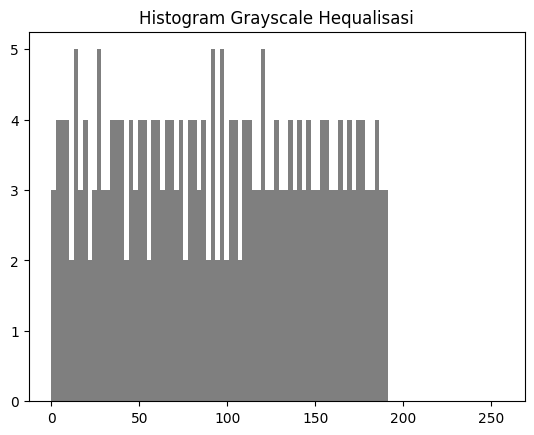

In [13]:
# inisialisasi variabel dengan panjang 256 elemen
hgh = np.zeros((256))
h = np.zeros((256))
c = np.zeros((256))

# Variabel hgh, h, dan c diinisialisasi sebagai array dengan panjang 256 dan diisi dengan 0. hgh akan menampung histogram grayscale gambar asli,
# h akan menampung nilai kumulatif dari histogram grayscale, dan c akan menampung histogram hasil ekualisasi.
for x in range(0, 256):
    hgh[x] = 0
    h[x] = 0
    c[x] = 0

#  looping for y in range(0, img_height): dan for x in range(0, img_width): digunakan untuk mengakses setiap piksel pada gambar grayscale. Variabel gray akan diisi dengan nilai keabuan dari piksel tersebut (nilai antara 0-255), kemudian hgh akan diupdate dengan menambahkan 1 pada indeks gray.
# Dengan demikian, di setiap indeks pada hgh akan menyimpan berapa banyak piksel pada gambar yang memiliki nilai keabuan tertentu.
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hgh[gray] += 1

# inisialisasi variabel h dengan nilai dai hgh              
h[0] = hgh[0]

# loop menghitung kumulatif histogram untuk h
for x in range(1, 256):
     h[x] = h[x-1] + hgh[x]

# loop normalisasi histogram dengan membagi setiap nilai dengan jumlah piksel dalam gambar
for x in range(0, 256):
     h[x] = h[x] / img_height / img_width

# inisialisasi variabel hgh dengan nol
for x in range(0, 256):
    hgh[x] = 0

 # loop iterasi pada setiap piksel dalam gambar   
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        gray = h[gray] * 255
        hgh[int(gray)] += 1

# inisialisasi variabel c dengan nilai dari hgh
c[0] = hgh[0]

# loop hitung kumulatif histogram c
for x in range(1, 256):
     c[x] = c[x-1] + hgh[x]

# hitung nilai maksimum dari c
hmaxk = c[255]

# normalisasi histogram dengan mengalikan setiap nilai
for x in range(0, 256):
    c[x] = 190 * c[x] / hmaxk

# menampilkan histogram
plt.hist(c, bins, color="black", alpha=0.5)
plt.title("Histogram Grayscale Hequalisasi")
plt.show()